In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./lakselus_per_fisk.csv')

# Check the first few rows of the data to understand its structure
data.head()

,week,year,Location number,Location name,Adult female lice,Lice in moving stages,Attached lice,Total lice,Probably without fish,Have counted salmon lice,...,Municipality,County number,County,Lat,Lon,Lice limit week,Over the lice limit week,Sea temperature,Production area Id,Production area
0,40,2023,30196,Ådnekvamme,NaN,NaN,NaN,0.0,Nei,Nei,...,MASFJORDEN,46.0,Vestland,60.832050,5.355017,0.5,NaN,NaN,4.0,Nordhordland til Stadt
1,40,2023,35297,Ådnøy Sø,NaN,NaN,NaN,0.0,Nei,Nei,...,SANDNES,11.0,Rogaland,58.914550,6.028583,0.5,NaN,NaN,2.0,Ryfylket
2,40,2023,30977,Æsøya,NaN,NaN,NaN,0.0,Nei,Nei,...,VESTVÅGØY,18.0,Nordland,68.104866,13.790067,0.5,NaN,NaN,9.0,Vestfjorden og Vesterålen
3,40,2023,15196,Aga Ø,NaN,NaN,NaN,0.0,Nei,Nei,...,BØMLO,46.0,Vestland,59.845917,5.260750,0.5,NaN,NaN,3.0,Karmøy til Sotra
4,40,2023,10331,Åkre,NaN,NaN,NaN,0.0,Ja,Nei,...,KVINNHERAD,46.0,Vestland,60.112830,6.044717,0.5,NaN,NaN,3.0,Karmøy til Sotra


In [17]:
data['Location number'].nunique()

1508

In [2]:
# Columns related to fish lice
lice_columns = ['Adult female lice', 'Lice in moving stages', 'Attached lice', 'Total lice']

# Count non-missing values for each lice column and sum them for each location
total_non_missing_counts = data.groupby('Location number')[lice_columns].count().sum(axis=1)

# Identify the location with the highest non-missing count across all lice columns
location_with_most_data_all = total_non_missing_counts.idxmax()
max_count_all = total_non_missing_counts.max()

location_with_most_data_all, max_count_all

(12154, 2134)

In [4]:
# Consider only the three specified lice columns
three_lice_columns = ['Adult female lice', 'Lice in moving stages', 'Attached lice']

# Identify rows where none of the three lice columns have missing values
rows_with_all_three_values = data[three_lice_columns].notnull().all(axis=1)

# For rows with values in all three columns, group by location number and count the rows
location_counts_all_three = data[rows_with_all_three_values].groupby('Location number').size()

# Identify the location with the highest count of rows with values in all three columns
location_with_most_rows_all_three = location_counts_all_three.idxmax()
max_rows_all_three = location_counts_all_three.max()

location_with_most_rows_all_three, max_rows_all_three

(12154, 524)

In [5]:
# Filter the dataset for location number 12154 and rows with non-missing values in all three lice columns
smørdalen_data = data[(data['Location number'] == 12154) & rows_with_all_three_values]

# # Save the filtered data to an Excel file
# file_path = "./location_12154_complete_lice_data.xlsx"
# smørdalen_data.to_excel(file_path, index=False)


In [18]:
# Count rows with missing sea temperature in the filtered data for location 12154 with complete lice data
empty_temperature_rows =smørdalen_data['Sea temperature'].isnull().sum()

empty_temperature_rows

0

In [7]:
smørdalen_data.isnull().sum(0)

week                        0
year                        0
Location number             0
Location name               0
Adult female lice           0
Lice in moving stages       0
Attached lice               0
Total lice                  0
Probably without fish       0
Have counted salmon lice    0
Municipality number         0
Municipality                0
County number               0
County                      0
Lat                         0
Lon                         0
Lice limit week             0
Over the lice limit week    0
Sea temperature             0
Production area Id          0
Production area             0
dtype: int64

In [19]:



smørdalen_data.head()

,week,year,Location number,Location name,Adult female lice,Lice in moving stages,Attached lice,Total lice,Probably without fish,Have counted salmon lice,...,Municipality,County number,County,Lat,Lon,Lice limit week,Over the lice limit week,Sea temperature,Production area Id,Production area
0,39,2023,12154,Smørdalen,0.00,0.00,0.02,0.02,0,1,...,MASFJORDEN,46,Vestland,60.868183,5.551717,0.5,0,15.0,4,Nordhordland til Stadt
1,38,2023,12154,Smørdalen,0.00,0.00,0.00,0.00,0,1,...,MASFJORDEN,46,Vestland,60.868183,5.551717,0.5,0,15.0,4,Nordhordland til Stadt
2,37,2023,12154,Smørdalen,0.05,0.05,0.00,0.10,0,1,...,MASFJORDEN,46,Vestland,60.868183,5.551717,0.5,0,14.3,4,Nordhordland til Stadt
3,36,2023,12154,Smørdalen,0.00,0.00,0.02,0.02,0,1,...,MASFJORDEN,46,Vestland,60.868183,5.551717,0.5,0,16.0,4,Nordhordland til Stadt
4,35,2023,12154,Smørdalen,0.00,0.00,0.00,0.00,0,1,...,MASFJORDEN,46,Vestland,60.868183,5.551717,0.5,0,16.0,4,Nordhordland til Stadt


In [9]:
smørdalen_data.shape

(524, 21)

In [10]:
# Checking the unique values in the mentioned columns
unique_values = {
    "Probably without fish": smørdalen_data["Probably without fish"].unique(),
    "Have counted salmon lice": smørdalen_data["Have counted salmon lice"].unique()
}

unique_values

print(smørdalen_data["Probably without fish"].unique())
print(smørdalen_data["Have counted salmon lice"].unique())


['Nei']
['Ja']


In [11]:
# Identify columns with values "Nei" and "Ja"
binary_cols = [col for col in smørdalen_data.columns if set(smørdalen_data[col].unique()) == {"Nei", "Ja"}]
smørdalen_data.loc[:, "Probably without fish"] = smørdalen_data["Probably without fish"].map({"Ja": 1, "Nei": 0})
smørdalen_data.loc[:, "Have counted salmon lice"] = smørdalen_data["Have counted salmon lice"].map({"Ja": 1, "Nei": 0})

smørdalen_data.loc[:, "Over the lice limit week"] = smørdalen_data["Over the lice limit week"].map({"Ja": 1, "Nei": 0})


smørdalen_data.head(10)

,week,year,Location number,Location name,Adult female lice,Lice in moving stages,Attached lice,Total lice,Probably without fish,Have counted salmon lice,...,Municipality,County number,County,Lat,Lon,Lice limit week,Over the lice limit week,Sea temperature,Production area Id,Production area
1946,39,2023,12154,Smørdalen,0.00,0.00,0.02,0.02,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,15.0,4.0,Nordhordland til Stadt
3014,38,2023,12154,Smørdalen,0.00,0.00,0.00,0.00,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,15.0,4.0,Nordhordland til Stadt
4083,37,2023,12154,Smørdalen,0.05,0.05,0.00,0.10,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,14.3,4.0,Nordhordland til Stadt
5154,36,2023,12154,Smørdalen,0.00,0.00,0.02,0.02,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,16.0,4.0,Nordhordland til Stadt
6224,35,2023,12154,Smørdalen,0.00,0.00,0.00,0.00,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,16.0,4.0,Nordhordland til Stadt
7297,34,2023,12154,Smørdalen,0.05,0.00,0.00,0.05,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,16.0,4.0,Nordhordland til Stadt
8369,33,2023,12154,Smørdalen,0.00,0.00,0.00,0.00,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,16.0,4.0,Nordhordland til Stadt
9441,32,2023,12154,Smørdalen,0.00,0.00,0.05,0.05,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,17.3,4.0,Nordhordland til Stadt
10513,31,2023,12154,Smørdalen,0.15,0.00,0.00,0.15,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,14.5,4.0,Nordhordland til Stadt
11584,30,2023,12154,Smørdalen,0.10,0.04,0.00,0.14,0,1,...,MASFJORDEN,46.0,Vestland,60.868183,5.551717,0.5,0,15.9,4.0,Nordhordland til Stadt


In [12]:

# # Save the filtered data to an Excel file
# file_path = "./smordalen_fishfarm.xlsx"
# smørdalen_data.to_excel(file_path, index=False)

In [20]:

# smørdalen_data= pd.read_csv("./smordalen_fishfarm.xlsx")
# print(smørdalen_data[["Probably without fish", "Have counted salmon lice", "Over the lice limit week"]].head(10))

smørdalen_data = pd.read_excel("./smordalen_fishfarm.xlsx", engine='openpyxl')


In [21]:
# Let's inspect the data types of the smørdalen_data dataframe (assuming the name is smørdalen_data)
# If the dataframe has a different name, this step will produce an error and we'll need the correct name.
import numpy as np



smørdalen_data.loc[:, "Probably without fish"] = smørdalen_data["Probably without fish"].astype(int)
smørdalen_data.loc[:, "Have counted salmon lice"] = smørdalen_data["Have counted salmon lice"].astype(int)
smørdalen_data.loc[:, "Over the lice limit week"] = smørdalen_data["Over the lice limit week"].astype(int)
smørdalen_data.loc[:, "Lice limit week"] = smørdalen_data["Lice limit week"].astype(np.float64)

try:
    data_types = smørdalen_data.dtypes
except NameError:
    data_types = "Dataframe 'smørdalen_data' is not loaded in this environment."

data_types


week                          int64
year                          int64
Location number               int64
Location name                object
Adult female lice           float64
Lice in moving stages       float64
Attached lice               float64
Total lice                  float64
Probably without fish         int64
Have counted salmon lice      int64
Municipality number           int64
Municipality                 object
County number                 int64
County                       object
Lat                         float64
Lon                         float64
Lice limit week             float64
Over the lice limit week      int64
Sea temperature             float64
Production area Id            int64
Production area              object
dtype: object

In [22]:



# Identify columns of type object
object_cols = smørdalen_data.select_dtypes(include=['object']).columns

# Convert these columns to numeric, setting errors='coerce' to turn invalid parsing into NaN
for col in object_cols:
  smørdalen_data.loc[:, col] = pd.to_numeric(smørdalen_data[col], errors='coerce')

smørdalen_data.drop(['Municipality','Municipality number', 'County number','County'], axis=1, inplace=True)


smørdalen_data.head(10)


,week,year,Location number,Location name,Adult female lice,Lice in moving stages,Attached lice,Total lice,Probably without fish,Have counted salmon lice,Lat,Lon,Lice limit week,Over the lice limit week,Sea temperature,Production area Id,Production area
0,39,2023,12154,NaN,0.00,0.00,0.02,0.02,0,1,60.868183,5.551717,0.5,0,15.0,4,NaN
1,38,2023,12154,NaN,0.00,0.00,0.00,0.00,0,1,60.868183,5.551717,0.5,0,15.0,4,NaN
2,37,2023,12154,NaN,0.05,0.05,0.00,0.10,0,1,60.868183,5.551717,0.5,0,14.3,4,NaN
3,36,2023,12154,NaN,0.00,0.00,0.02,0.02,0,1,60.868183,5.551717,0.5,0,16.0,4,NaN
4,35,2023,12154,NaN,0.00,0.00,0.00,0.00,0,1,60.868183,5.551717,0.5,0,16.0,4,NaN
5,34,2023,12154,NaN,0.05,0.00,0.00,0.05,0,1,60.868183,5.551717,0.5,0,16.0,4,NaN
6,33,2023,12154,NaN,0.00,0.00,0.00,0.00,0,1,60.868183,5.551717,0.5,0,16.0,4,NaN
7,32,2023,12154,NaN,0.00,0.00,0.05,0.05,0,1,60.868183,5.551717,0.5,0,17.3,4,NaN
8,31,2023,12154,NaN,0.15,0.00,0.00,0.15,0,1,60.868183,5.551717,0.5,0,14.5,4,NaN
9,30,2023,12154,NaN,0.10,0.04,0.00,0.14,0,1,60.868183,5.551717,0.5,0,15.9,4,NaN


In [23]:
print(smørdalen_data['Lat'].unique())


[60.868183 60.8675  ]


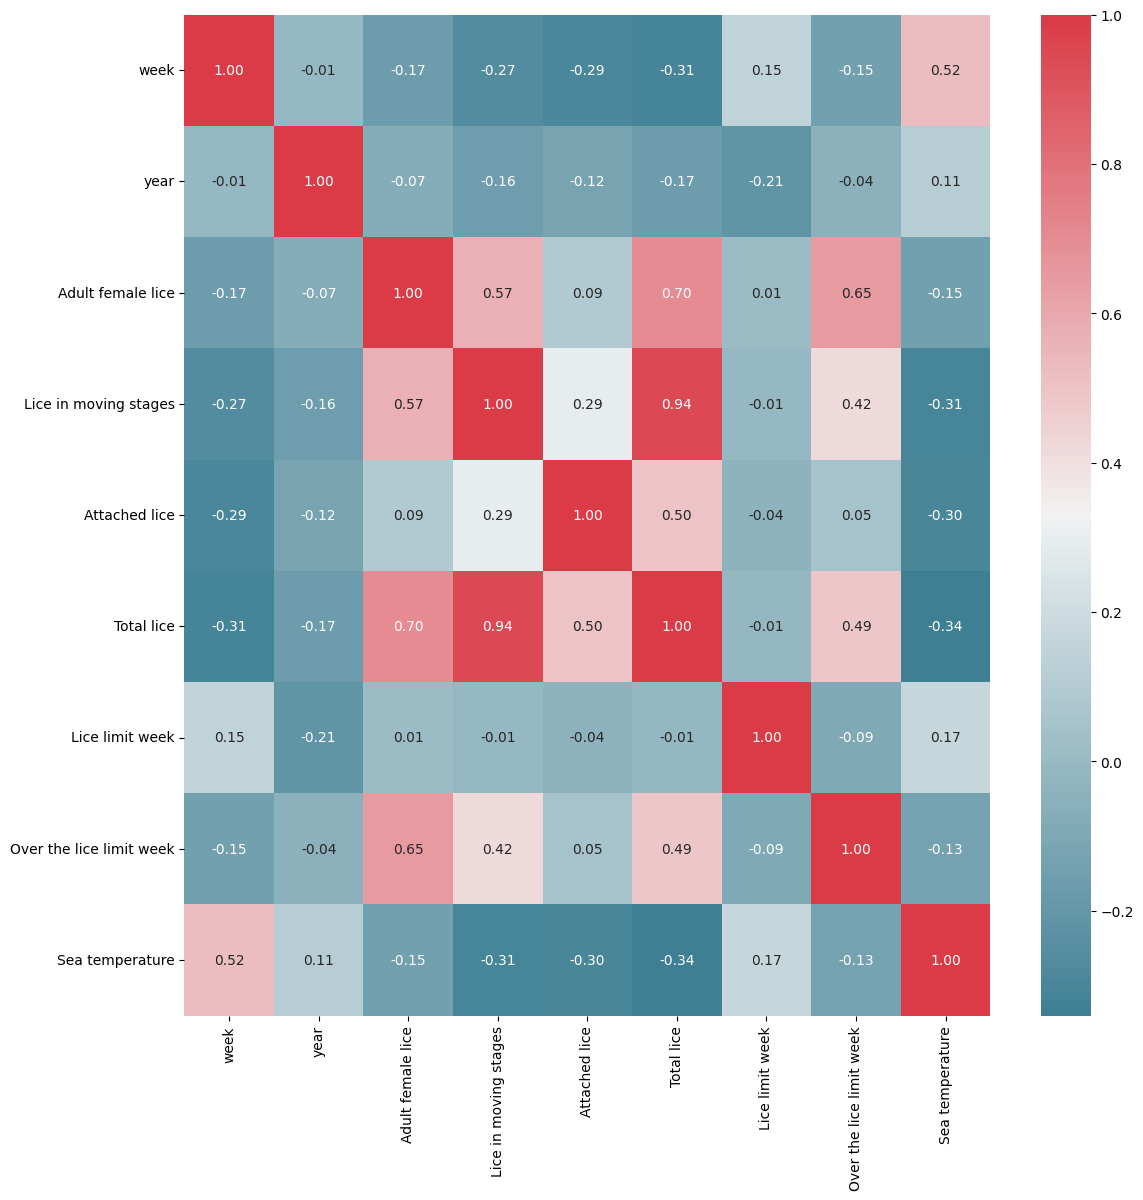

Index(['week', 'year', 'Adult female lice', 'Lice in moving stages',
       'Attached lice', 'Total lice', 'Lice limit week',
       'Over the lice limit week', 'Sea temperature'],
      dtype='object')
   week  year  Adult female lice  Lice in moving stages  Attached lice   
0    39  2023               0.00                   0.00           0.02  \
1    38  2023               0.00                   0.00           0.00   
2    37  2023               0.05                   0.05           0.00   
3    36  2023               0.00                   0.00           0.02   
4    35  2023               0.00                   0.00           0.00   

   Total lice  Lice limit week  Over the lice limit week  Sea temperature  
0        0.02              0.5                         0             15.0  
1        0.00              0.5                         0             15.0  
2        0.10              0.5                         0             14.3  
3        0.02              0.5                  

In [17]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt


# Exclude columns with constant values
non_constant_cols = smørdalen_data.columns[smørdalen_data.nunique() > 1]
filtered_data = smørdalen_data[non_constant_cols]

filtered_data = filtered_data.copy()
filtered_data.drop(['Lat','Lon'], axis=1, inplace=True)
# Compute the correlation on the filtered data
corr = filtered_data.corr()


# Set up the figure and axis
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1,1,1)

# Set up the colormap
colormap = sbn.diverging_palette(220, 10, as_cmap=True)



# filtered_data.drop.([])





# Plot the heatmap
sbn.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", ax=ax)
plt.show()
print (filtered_data.columns)
print(filtered_data.head())
# print (corr)

In [24]:
# Scatter plot for Sea temperature vs. Total lice
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=filtered_data, x="Sea temperature", y="Total lice", alpha=0.7)
plt.title("Scatter plot of Sea temperature vs. Total lice")
plt.show()

# Scatter plot for Sea temperature vs. Adult female lice
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=filtered_data, x="Sea temperature", y="Adult female lice", alpha=0.7)
plt.title("Scatter plot of Sea temperature vs. Adult female lice")
plt.show()

# Scatter plot for Sea temperature vs. Lice in moving stages
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=filtered_data, x="Sea temperature", y="Lice in moving stages", alpha=0.7)
plt.title("Scatter plot of Sea temperature vs. Lice in moving stages")
plt.show()

# Scatter plot for Sea temperature vs. Attached lice
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=filtered_data, x="Sea temperature", y="Attached lice", alpha=0.7)
plt.title("Scatter plot of Sea temperature vs. Attached lice")
plt.show()


NameError: name 'plt' is not defined

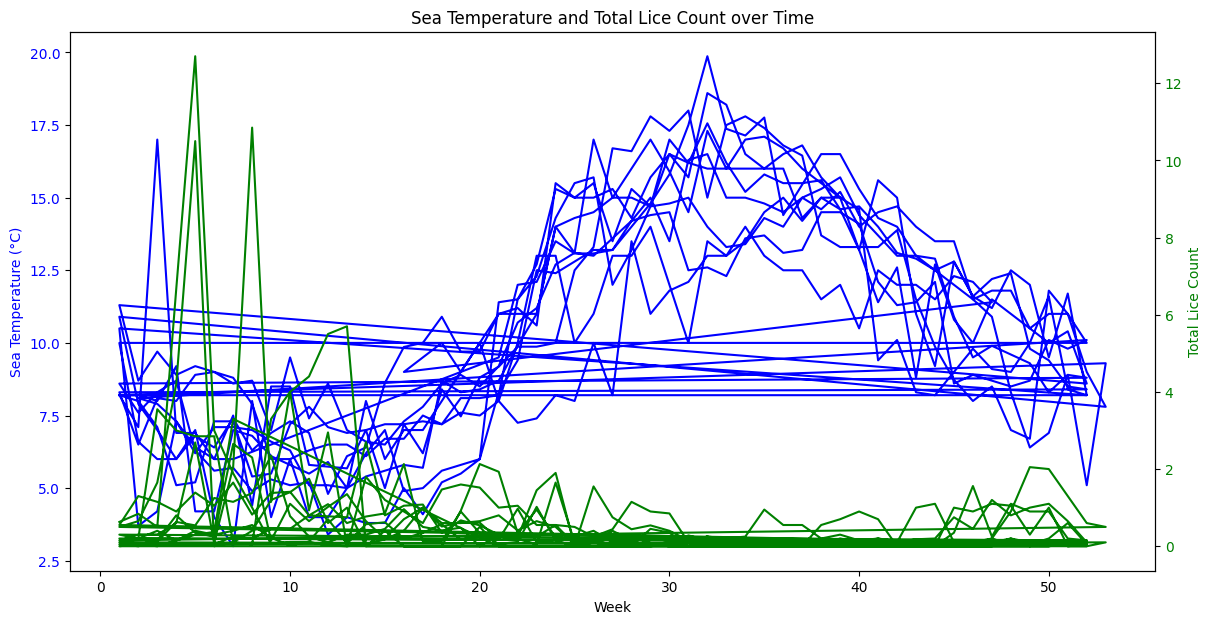

In [116]:
# Plotting the trends
plt.figure(figsize=(14, 7))

# Plotting Sea temperature
plt.plot(smørdalen_data['week'], smørdalen_data['Sea temperature'], label='Sea Temperature', color='blue')
plt.ylabel('Sea Temperature (°C)', color='blue')
plt.xlabel('Week')
plt.title('Sea Temperature and Total Lice Count over Time')
plt.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis to plot Total Lice count
ax2 = plt.gca().twinx()
ax2.plot(smørdalen_data['week'], smørdalen_data['Total lice'], label='Total Lice Count', color='green')
ax2.set_ylabel('Total Lice Count', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()


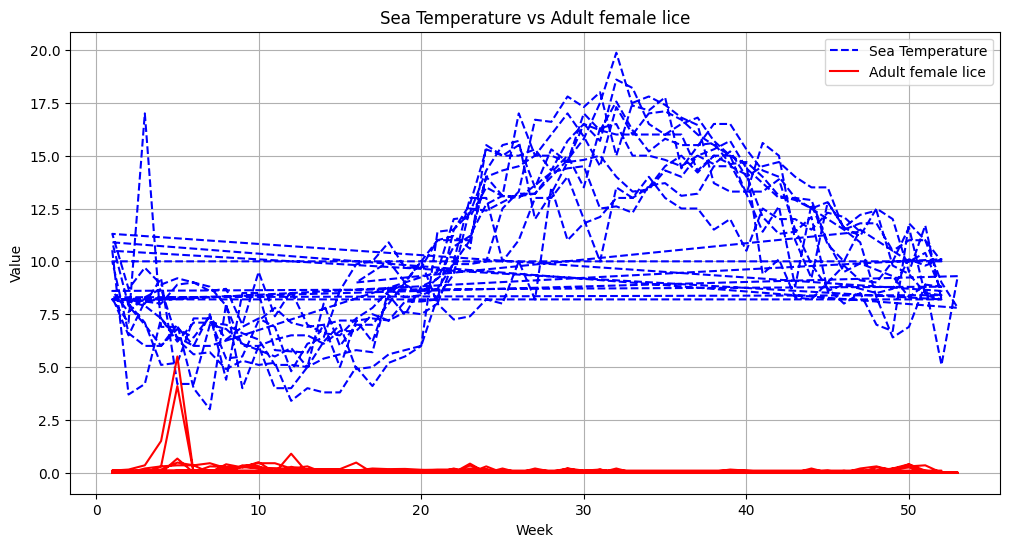

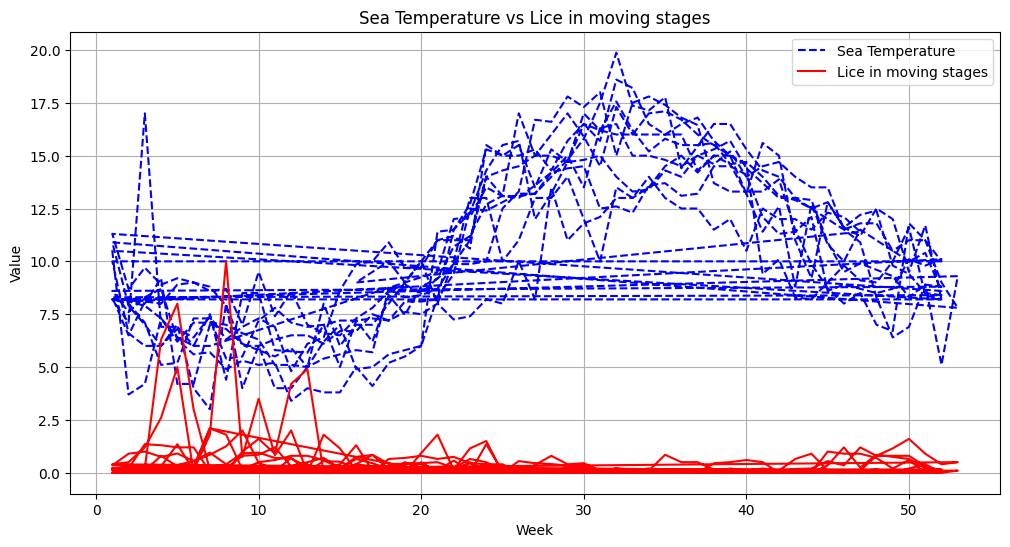

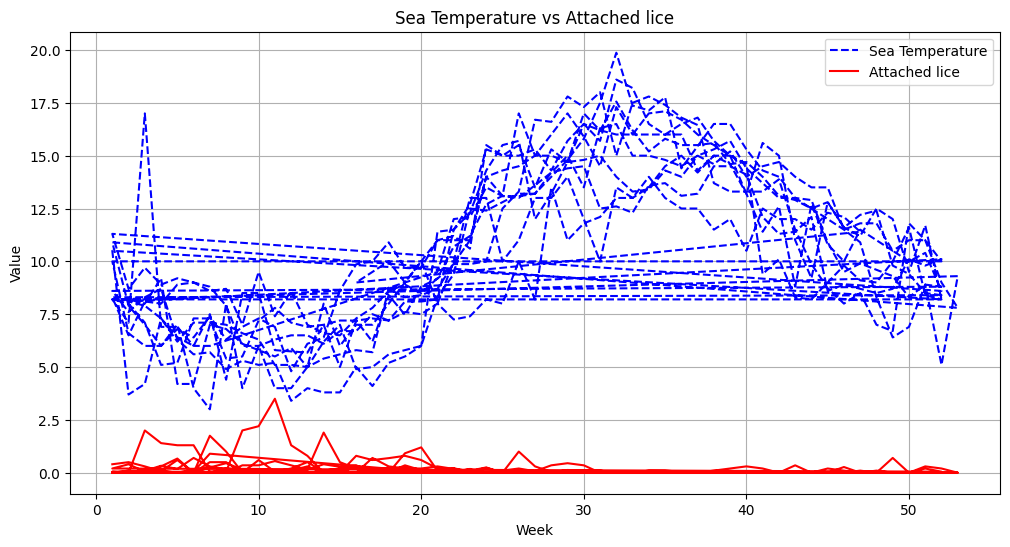

In [74]:
import matplotlib.pyplot as plt

# List of lice types
lice_types = ["Adult female lice", "Lice in moving stages", "Attached lice"]

# Loop through each lice type and create a separate plot
for lice_type in lice_types:
    plt.figure(figsize=(12, 6))
    
    # Plot sea temperature
    plt.plot(smørdalen_data["week"], smørdalen_data["Sea temperature"], label="Sea Temperature", color="blue", linestyle="--")
    
    # Plot lice count
    plt.plot(smørdalen_data["week"], smørdalen_data[lice_type], label=lice_type, color="red")
    
    plt.title(f"Sea Temperature vs {lice_type}")
    plt.xlabel("Week")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


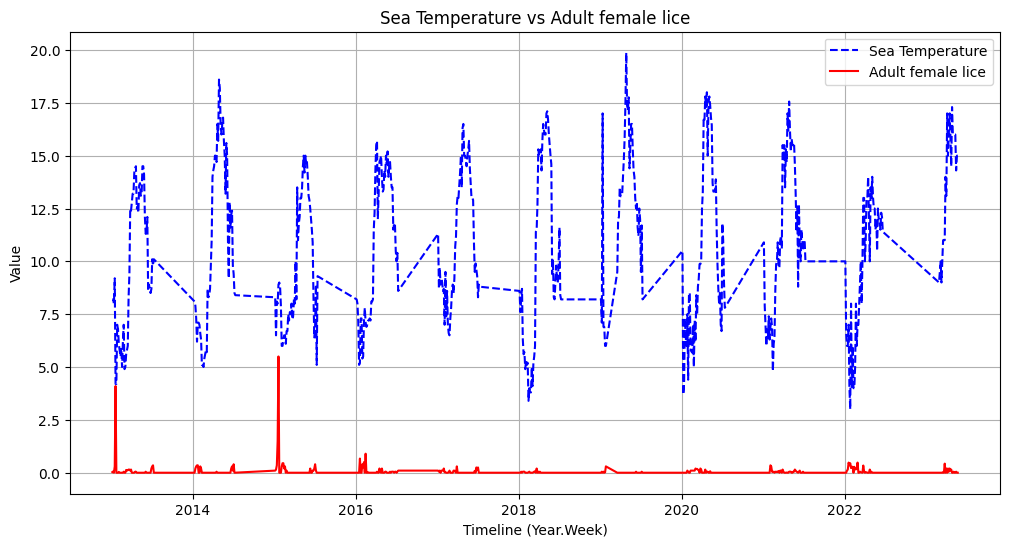

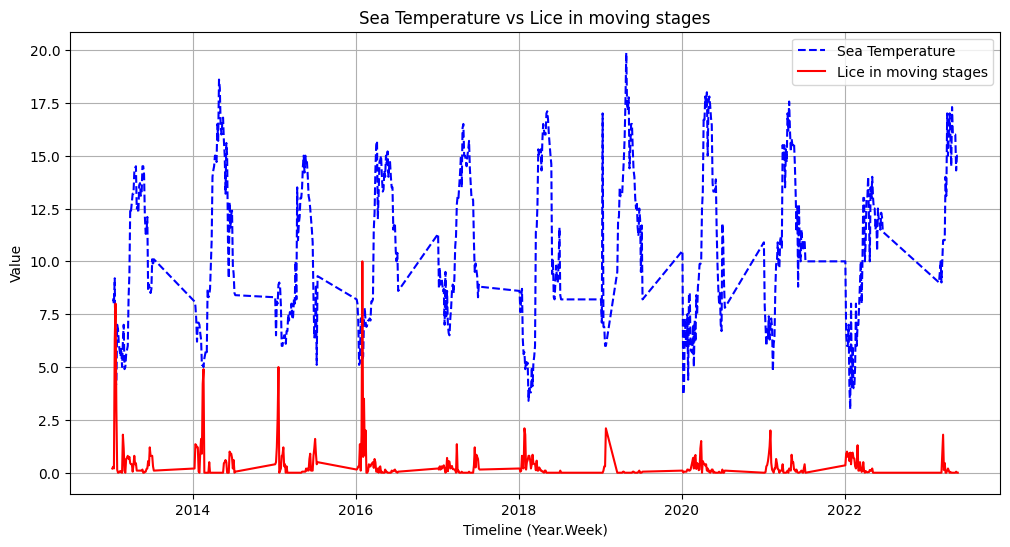

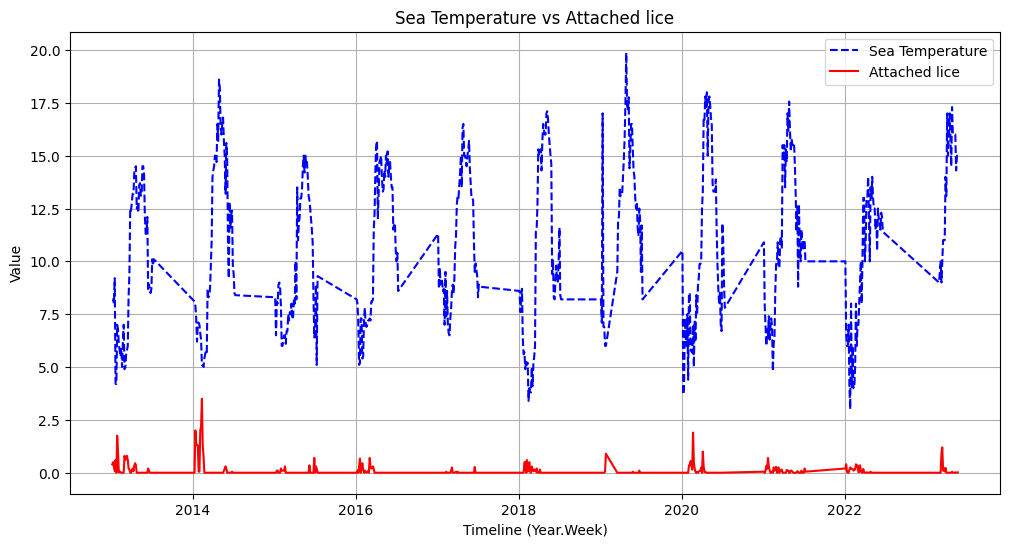

In [19]:
# Create a timeline column
smørdalen_data["timeline"] = smørdalen_data["year"] + (smørdalen_data["week"] / 100)

# Then, use the 'timeline' column for plotting:
import matplotlib.pyplot as plt

# List of lice types
lice_types = ["Adult female lice", "Lice in moving stages", "Attached lice"]

# Loop through each lice type and create a separate plot
for lice_type in lice_types:
    plt.figure(figsize=(12, 6))
    
    # Plot sea temperature
    plt.plot(smørdalen_data["timeline"], smørdalen_data["Sea temperature"], label="Sea Temperature", color="blue", linestyle="--")
    
    # Plot lice count
    plt.plot(smørdalen_data["timeline"], smørdalen_data[lice_type], label=lice_type, color="red")
    
    plt.title(f"Sea Temperature vs {lice_type}")
    plt.xlabel("Timeline (Year.Week)")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


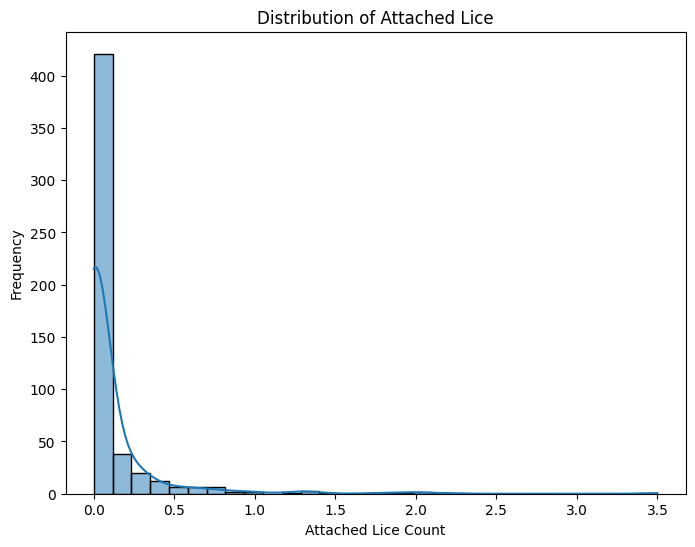

count    524.000000
mean       0.107729
std        0.309346
min        0.000000
25%        0.000000
50%        0.000000
75%        0.070000
max        3.500000
Name: Attached lice, dtype: float64


In [20]:
# Visualizing the distribution of the 'Attached lice' column
plt.figure(figsize=(8,6))
sbn.histplot(smørdalen_data['Attached lice'], bins=30, kde=True)
plt.title('Distribution of Attached Lice')
plt.xlabel('Attached Lice Count')
plt.ylabel('Frequency')
plt.show()

summary_statistics = smørdalen_data['Attached lice'].describe()
print(summary_statistics)


In [21]:
smørdalen_data.head()


,week,year,Location number,Location name,Adult female lice,Lice in moving stages,Attached lice,Total lice,Probably without fish,Have counted salmon lice,Lat,Lon,Lice limit week,Over the lice limit week,Sea temperature,Production area Id,Production area,timeline
0,39,2023,12154,NaN,0.00,0.00,0.02,0.02,0,1,60.868183,5.551717,0.5,0,15.0,4,NaN,2023.39
1,38,2023,12154,NaN,0.00,0.00,0.00,0.00,0,1,60.868183,5.551717,0.5,0,15.0,4,NaN,2023.38
2,37,2023,12154,NaN,0.05,0.05,0.00,0.10,0,1,60.868183,5.551717,0.5,0,14.3,4,NaN,2023.37
3,36,2023,12154,NaN,0.00,0.00,0.02,0.02,0,1,60.868183,5.551717,0.5,0,16.0,4,NaN,2023.36
4,35,2023,12154,NaN,0.00,0.00,0.00,0.00,0,1,60.868183,5.551717,0.5,0,16.0,4,NaN,2023.35


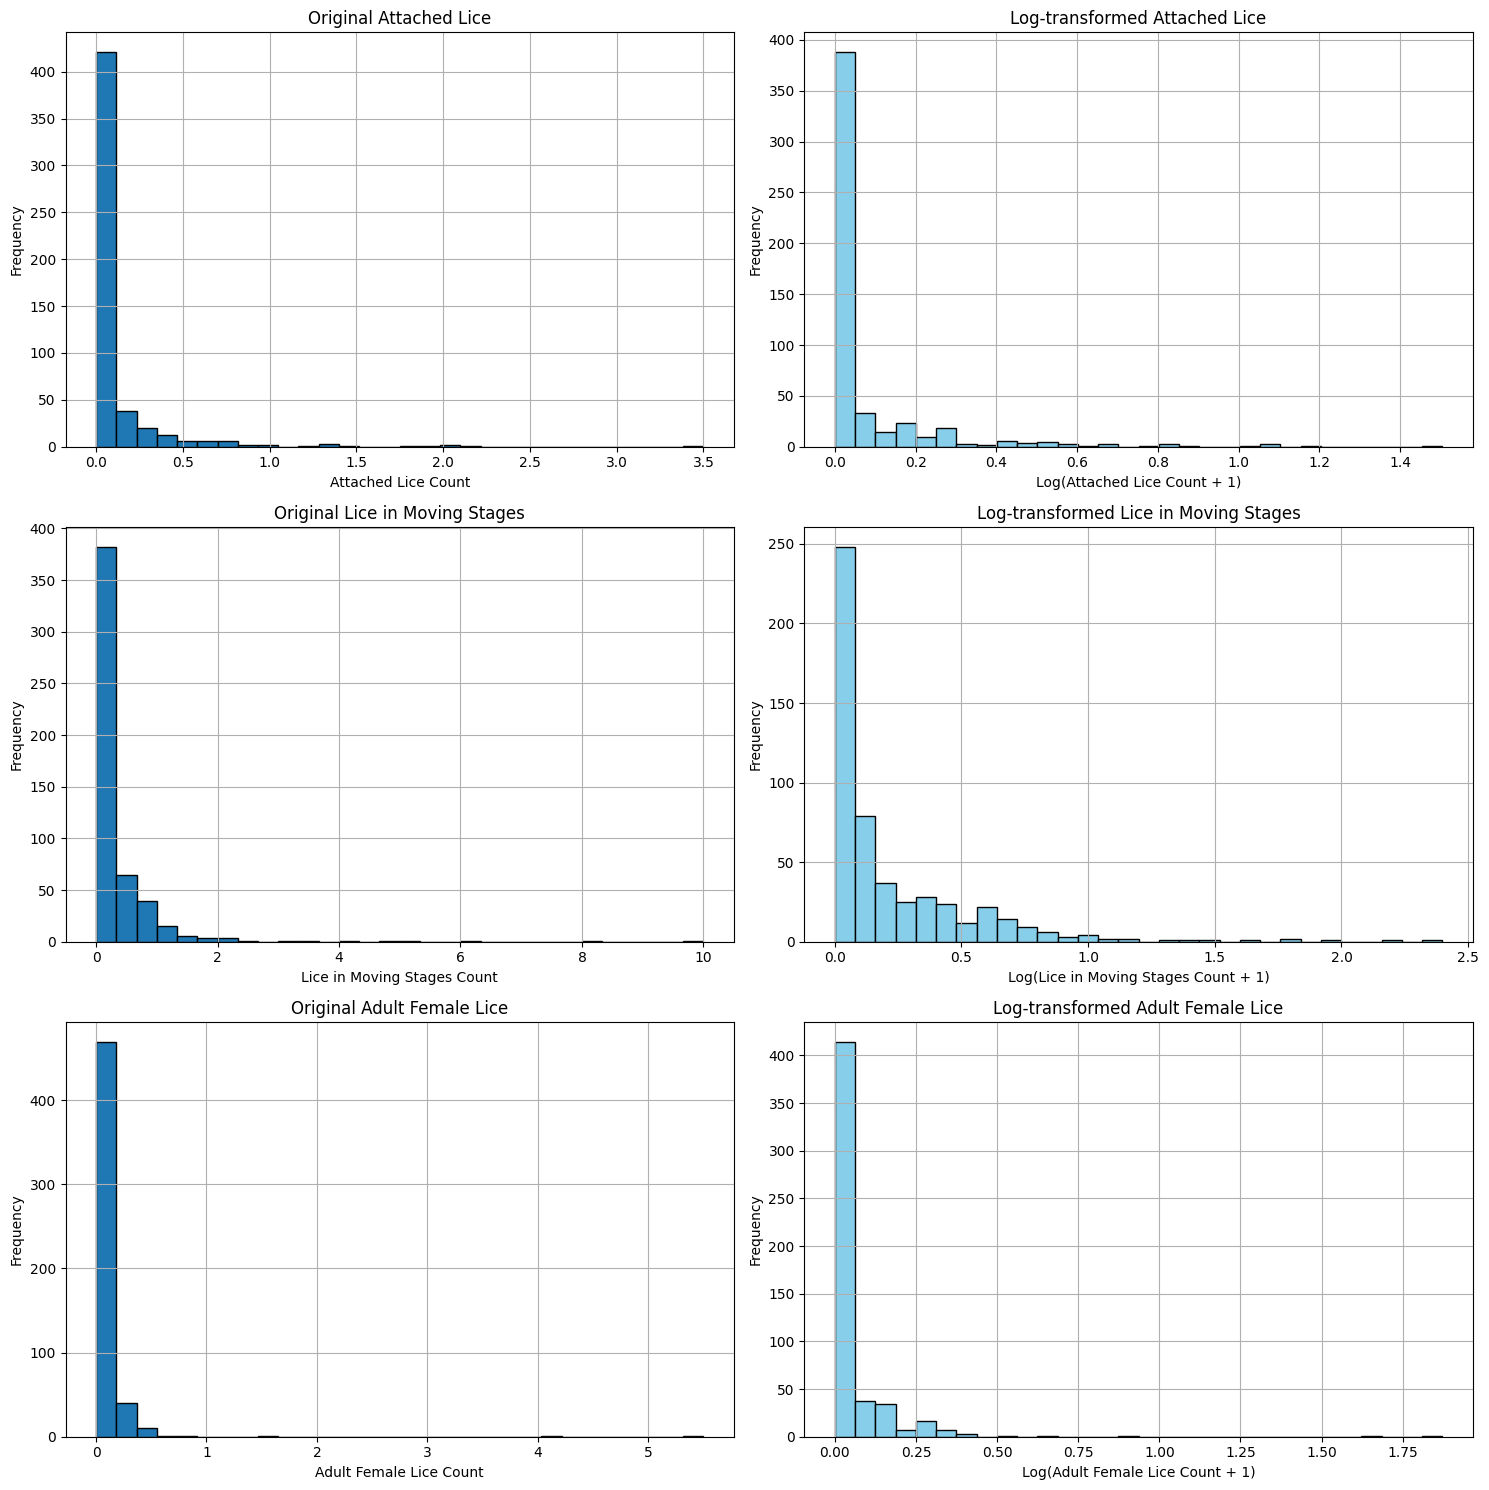

In [23]:
# import numpy as np

# # Apply the logarithmic transformation
# smørdalen_data['Log_Attached_lice'] = np.log(smørdalen_data['Attached lice'] + 1)
# smørdalen_data['Log_lice_in_moving'] = np.log(smørdalen_data['Lice in moving stages'] + 1)
# smørdalen_data['Log_adult_female_lice'] = np.log(smørdalen_data['Adult female lice'] + 1)

# # Plotting the transformed data
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# # Original Data
# smørdalen_data['Attached lice'].hist(ax=ax[0], bins=30, edgecolor='black')
# ax[0].set_title('Original Attached Lice')
# ax[0].set_xlabel('Attached Lice Count')
# ax[0].set_ylabel('Frequency')

# # Transformed Data
# smørdalen_data['Log_Attached_lice'].hist(ax=ax[1], bins=30, edgecolor='black', color='skyblue')
# ax[1].set_title('Log-transformed Attached Lice')
# ax[1].set_xlabel('Log(Attached Lice Count + 1)')
# ax[1].set_ylabel('Frequency')

# plt.tight_layout()
# plt.show()

# print(smørdalen_data['Log_Attached_lice'].describe())

# print(smørdalen_data['Sea temperature'].describe())



# Ensuring no NaN values before transformation
smørdalen_data['Lice in moving stages'].fillna(0, inplace=True)
smørdalen_data['Adult female lice'].fillna(0, inplace=True)

# Applying the logarithmic transformation again
smørdalen_data['Log_lice_in_moving'] = np.log1p(smørdalen_data['Lice in moving stages'])
smørdalen_data['Log_adult_female_lice'] = np.log1p(smørdalen_data['Adult female lice'])
smørdalen_data['Log_Attached_lice'] = np.log1p(smørdalen_data['Attached lice'])


# Plotting the transformed data for all lice types
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Original and Transformed Data for 'Attached lice'
smørdalen_data['Attached lice'].hist(ax=axes[0, 0], bins=30, edgecolor='black')
axes[0, 0].set_title('Original Attached Lice')
axes[0, 0].set_xlabel('Attached Lice Count')
axes[0, 0].set_ylabel('Frequency')

smørdalen_data['Log_Attached_lice'].hist(ax=axes[0, 1], bins=30, edgecolor='black', color='skyblue')
axes[0, 1].set_title('Log-transformed Attached Lice')
axes[0, 1].set_xlabel('Log(Attached Lice Count + 1)')
axes[0, 1].set_ylabel('Frequency')

# Original and Transformed Data for 'Lice in moving stages'
smørdalen_data['Lice in moving stages'].hist(ax=axes[1, 0], bins=30, edgecolor='black')
axes[1, 0].set_title('Original Lice in Moving Stages')
axes[1, 0].set_xlabel('Lice in Moving Stages Count')
axes[1, 0].set_ylabel('Frequency')

smørdalen_data['Log_lice_in_moving'].hist(ax=axes[1, 1], bins=30, edgecolor='black', color='skyblue')
axes[1, 1].set_title('Log-transformed Lice in Moving Stages')
axes[1, 1].set_xlabel('Log(Lice in Moving Stages Count + 1)')
axes[1, 1].set_ylabel('Frequency')

# Original and Transformed Data for 'Adult female lice'
smørdalen_data['Adult female lice'].hist(ax=axes[2, 0], bins=30, edgecolor='black')
axes[2, 0].set_title('Original Adult Female Lice')
axes[2, 0].set_xlabel('Adult Female Lice Count')
axes[2, 0].set_ylabel('Frequency')

smørdalen_data['Log_adult_female_lice'].hist(ax=axes[2, 1], bins=30, edgecolor='black', color='skyblue')
axes[2, 1].set_title('Log-transformed Adult Female Lice')
axes[2, 1].set_xlabel('Log(Adult Female Lice Count + 1)')
axes[2, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


   week  year  Adult female lice  Lice in moving stages  Attached lice   
0    39  2023               0.00                   0.00           0.02  \
1    38  2023               0.00                   0.00           0.00   
2    37  2023               0.05                   0.05           0.00   
3    36  2023               0.00                   0.00           0.02   
4    35  2023               0.00                   0.00           0.00   

   Total lice        Lat       Lon  Lice limit week  Over the lice limit week   
0        0.02  60.868183  5.551717              0.5                         0  \
1        0.00  60.868183  5.551717              0.5                         0   
2        0.10  60.868183  5.551717              0.5                         0   
3        0.02  60.868183  5.551717              0.5                         0   
4        0.00  60.868183  5.551717              0.5                         0   

   Sea temperature  timeline  Log_lice_in_moving  Log_adult_female_l

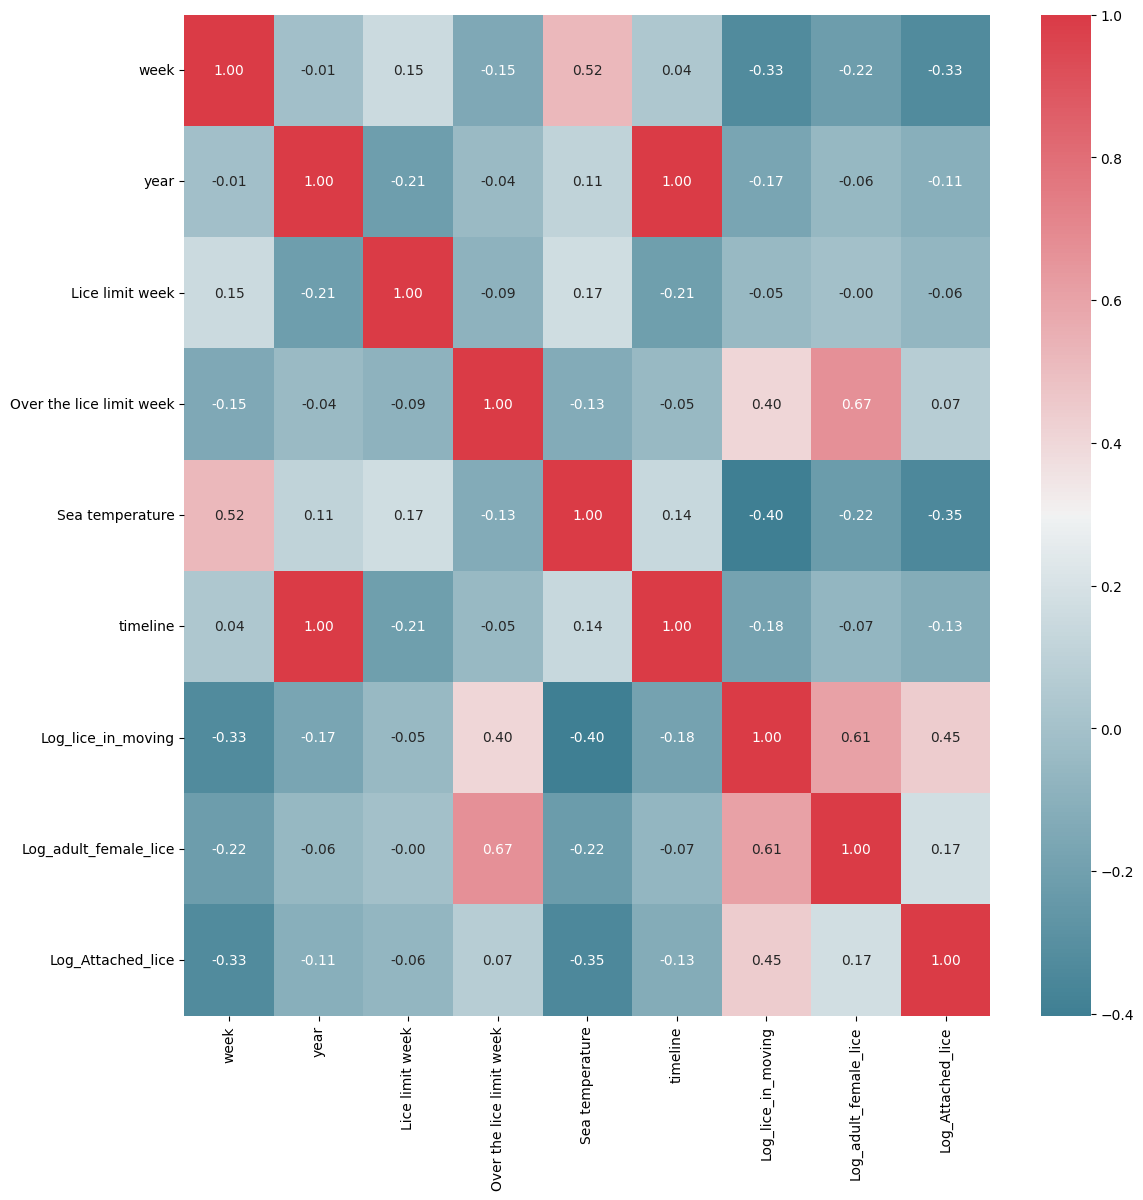

                              week      year  Lice limit week   
week                      1.000000 -0.008334         0.151182  \
year                     -0.008334  1.000000        -0.214203   
Lice limit week           0.151182 -0.214203         1.000000   
Over the lice limit week -0.148466 -0.042445        -0.089245   
Sea temperature           0.522947  0.111472         0.168003   
timeline                  0.040117  0.998826        -0.206714   
Log_lice_in_moving       -0.327048 -0.168665        -0.051949   
Log_adult_female_lice    -0.218330 -0.057166        -0.003192   
Log_Attached_lice        -0.331208 -0.109848        -0.064124   

                          Over the lice limit week  Sea temperature  timeline   
week                                     -0.148466         0.522947  0.040117  \
year                                     -0.042445         0.111472  0.998826   
Lice limit week                          -0.089245         0.168003 -0.206714   
Over the lice limit week 

In [42]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt


# Exclude columns with constant values
columns = smørdalen_data.columns[smørdalen_data.nunique() > 1]
# print(heatmap_df)
heatmap_df = smørdalen_data[columns]
print(heatmap_df.head())
filtered_heatmap_df = heatmap_df.copy()

filtered_heatmap_df.drop(["Adult female lice","Attached lice","Total lice","Lat","Lon",'Lice in moving stages'],axis=1,inplace=True)
print(filtered_heatmap_df.columns)
# filtered_heatmap_df.drop(['Lat','Lon'], axis=1, inplace=True)
# # Compute the correlation on the filtered data
corr = filtered_heatmap_df.corr()


# Set up the figure and axis
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1,1,1)

# # Set up the colormap
colormap = sbn.diverging_palette(220, 10, as_cmap=True)



# # filtered_data.drop.([])



# # Save the filtered data to an Excel file
# file_path = "./smørdalen_data_for_ML.xlsx"
# filtered_heatmap_df.to_excel(file_path, index=False)


# # Plot the heatmap
sbn.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", ax=ax)
plt.show()

print(corr)
# print (filtered_data.columns)
# print(filtered_data.head())

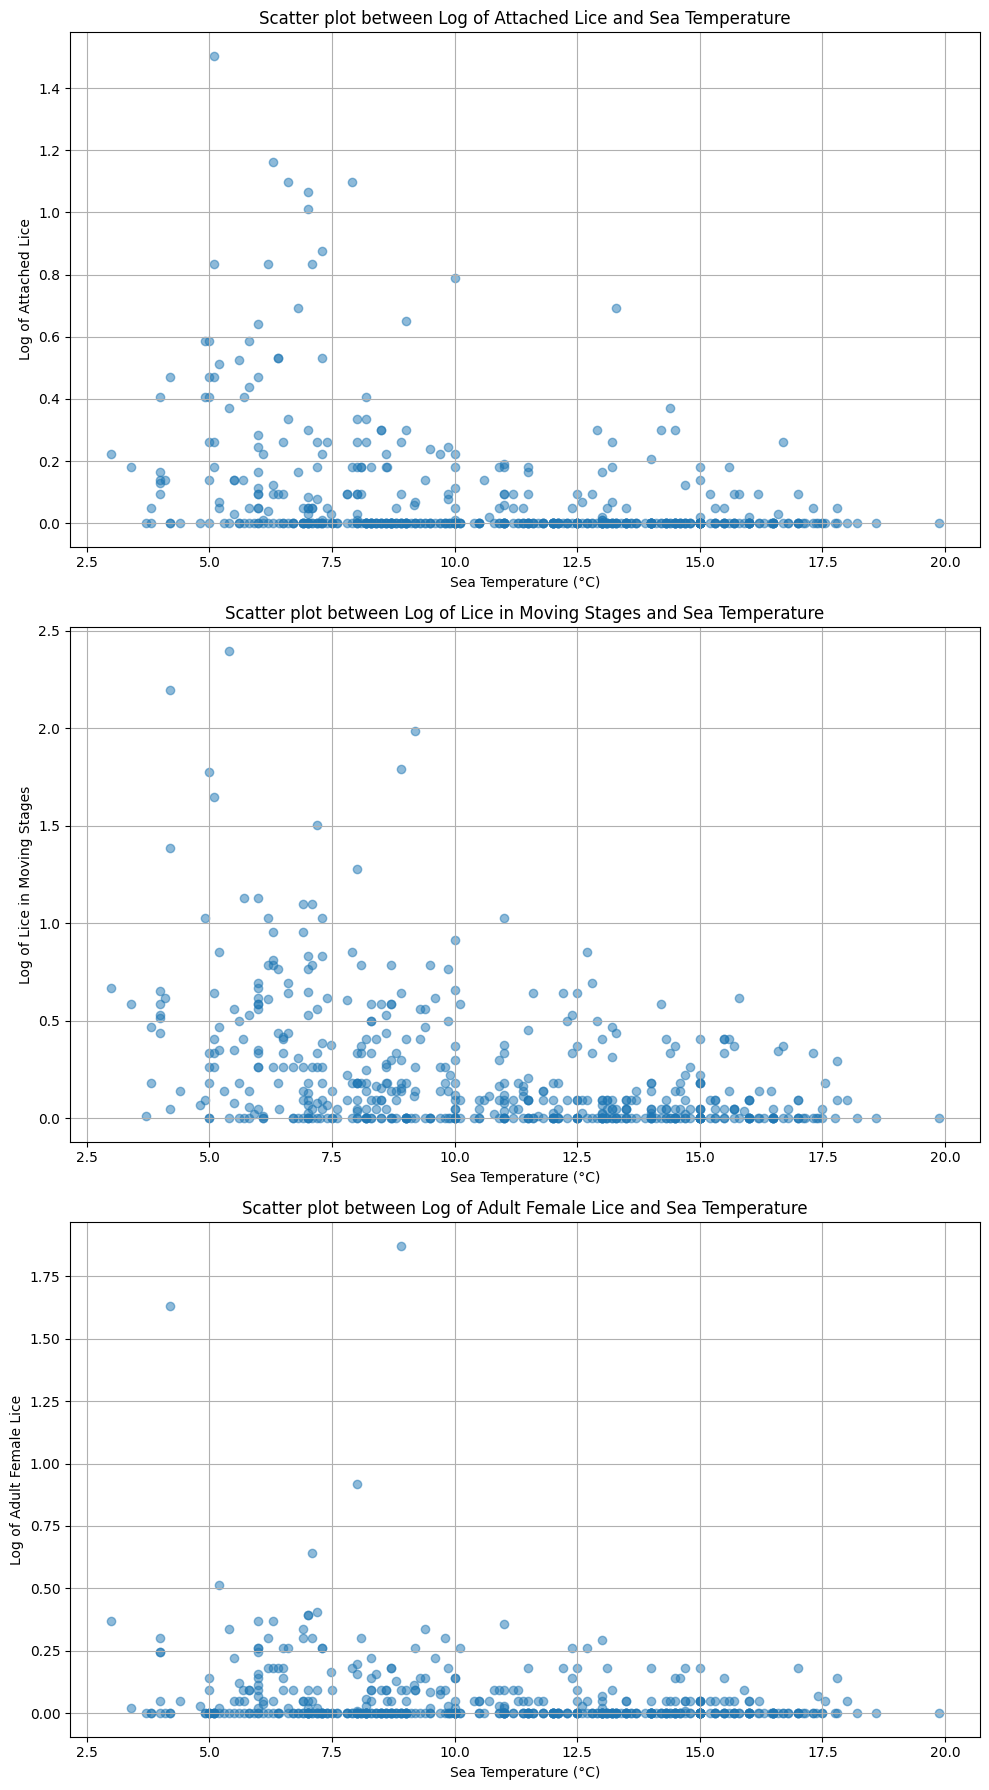

(-0.34577051162742123, -0.40279637186218303, -0.22455713140775305)

In [99]:
# Setting up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# List of lice types and their respective labels
lice_types = ["Log_Attached_lice", "Log_lice_in_moving", "Log_adult_female_lice"]
lice_labels = ["Log of Attached Lice", "Log of Lice in Moving Stages", "Log of Adult Female Lice"]

# Loop through each lice type and create a scatter plot
for ax, lice_type, label in zip(axes, lice_types, lice_labels):
    ax.scatter(smørdalen_data['Sea temperature'], smørdalen_data[lice_type], alpha=0.5)
    ax.set_title(f'Scatter plot between {label} and Sea Temperature')
    ax.set_xlabel('Sea Temperature (°C)')
    ax.set_ylabel(label)
    ax.grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()

# Calculating correlation coefficients
correlation_coeff_attached = smørdalen_data['Log_Attached_lice'].corr(smørdalen_data['Sea temperature'])
correlation_coeff_moving = smørdalen_data['Log_lice_in_moving'].corr(smørdalen_data['Sea temperature'])
correlation_coeff_adult = smørdalen_data['Log_adult_female_lice'].corr(smørdalen_data['Sea temperature'])

correlation_coeff_attached, correlation_coeff_moving, correlation_coeff_adult


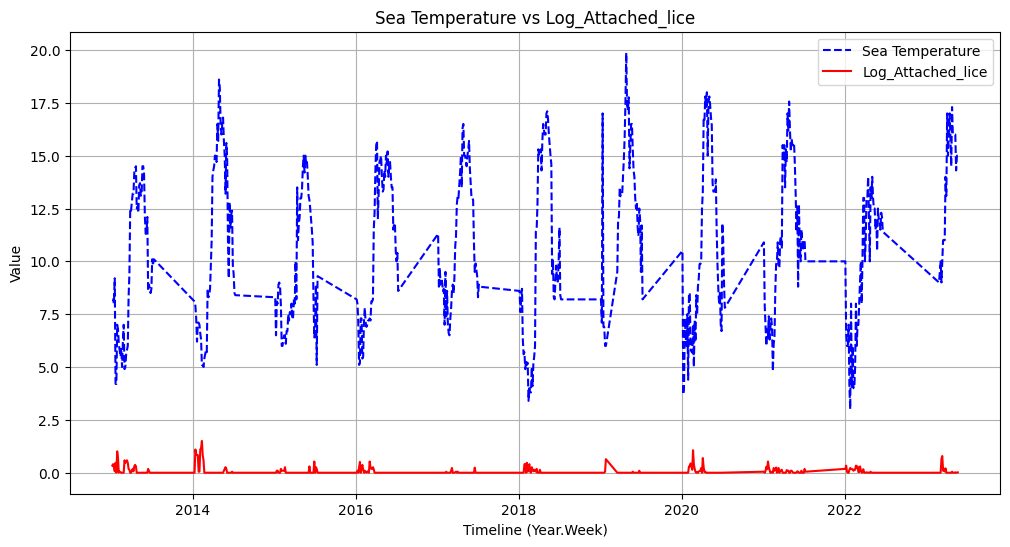

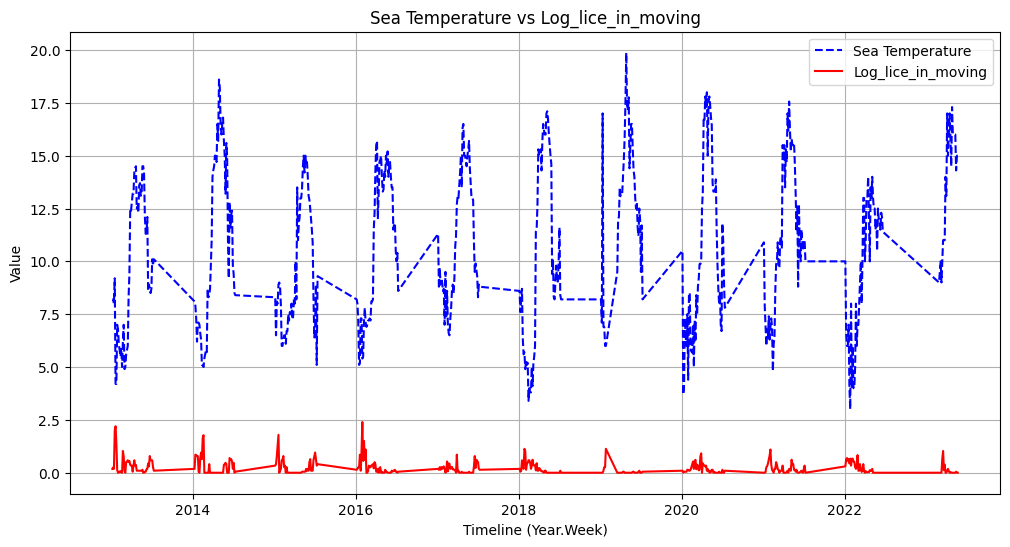

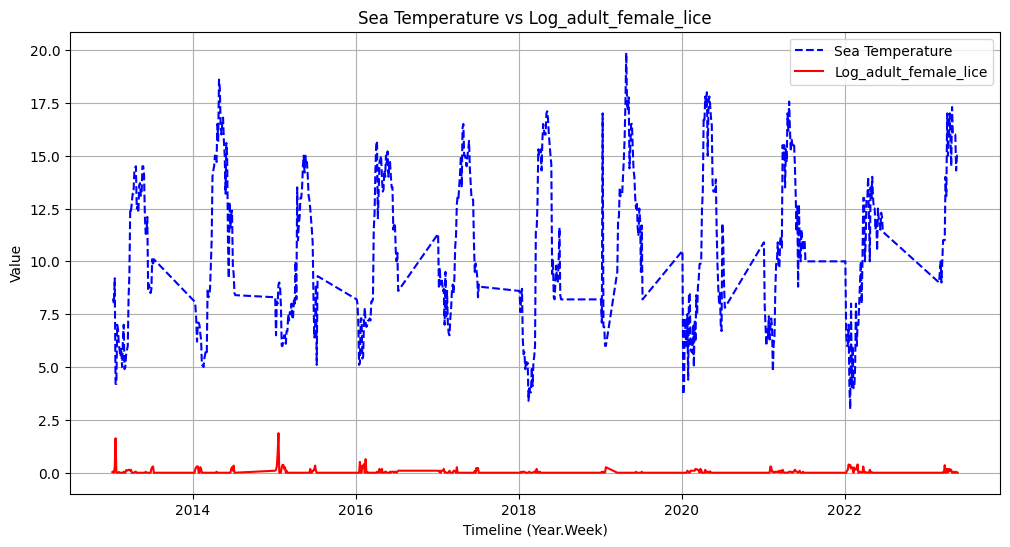

In [100]:
# List of lice types and their transformed counterparts
lice_types = ["Attached lice", "Lice in moving stages", "Adult female lice"]
log_lice_types = ["Log_Attached_lice", "Log_lice_in_moving", "Log_adult_female_lice"]

# Loop through each lice type and create a separate plot
for lice_type, log_lice_type in zip(lice_types, log_lice_types):
    plt.figure(figsize=(12, 6))
    
    # Plot sea temperature
    plt.plot(smørdalen_data["timeline"], smørdalen_data["Sea temperature"], label="Sea Temperature", color="blue", linestyle="--")
    
    # Plot lice count
    plt.plot(smørdalen_data["timeline"], smørdalen_data[log_lice_type], label=log_lice_type, color="red")
    
    plt.title(f"Sea Temperature vs {log_lice_type}")
    plt.xlabel("Timeline (Year.Week)")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


In [128]:
# Calculate the correlation matrix
corr_matrix = smørdalen_data.corr()

# Extract the columns with a correlation to "Sea temperature" above the threshold (excluding 'week')
selected_columns = [col for col in corr_matrix.index if (0.2 < abs(corr_matrix.loc[col, "Sea temperature"]) < 1.0) and col != 'week']

# Add "Sea temperature" to the list of selected columns (in case it's not already there)
if "Sea temperature" not in selected_columns:
    selected_columns.append("Sea temperature")

# Create the new dataframe
smordalen_selected = smørdalen_data[selected_columns]

smordalen_selected.head()


,Lice in moving stages,Attached lice,Total lice,Log_lice_in_moving,Log_adult_female_lice,Sea temperature
0,0.00,0.02,0.02,0.00000,0.00000,15.0
1,0.00,0.00,0.00,0.00000,0.00000,15.0
2,0.05,0.00,0.10,0.04879,0.04879,14.3
3,0.00,0.02,0.02,0.00000,0.00000,16.0
4,0.00,0.00,0.00,0.00000,0.00000,16.0


In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data into train and test sets
X = smordalen_selected.drop("Sea temperature", axis=1)
y = smordalen_selected["Sea temperature"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 12.151653384937351


In [130]:
# Extract log-transformed lice columns that have a significant correlation with 'Sea temperature'
log_columns = [col for col in corr_matrix.index if "Log_" in col]
selected_log_columns = [col for col in log_columns if 0.2 < abs(corr_matrix.loc[col, "Sea temperature"])]

# Create the new dataframe with only selected log columns and 'Sea temperature'
smordalen_log_selected = smørdalen_data[selected_log_columns + ["Sea temperature"]]

smordalen_log_selected.head()

,Log_lice_in_moving,Log_adult_female_lice,Sea temperature
0,0.00000,0.00000,15.0
1,0.00000,0.00000,15.0
2,0.04879,0.04879,14.3
3,0.00000,0.00000,16.0
4,0.00000,0.00000,16.0


In [137]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error



# Splitting the data for predicting `Log_lice_in_moving`
X = smordalen_log_selected[['Sea temperature']]
y_moving = smordalen_log_selected['Log_lice_in_moving']

# Split into training and testing sets (80% training, 20% testing)
X_train_moving, X_test_moving, y_train_moving, y_test_moving = train_test_split(X, y_moving, test_size=0.2, random_state=42)

# Train a Linear Regression model for `Log_lice_in_moving`
model_moving = LinearRegression()
model_moving.fit(X_train_moving, y_train_moving)

# Predict using the test set
y_pred_moving = model_moving.predict(X_test_moving)

# Evaluate the model
mae_moving = mean_absolute_error(y_test_moving, y_pred_moving)
mse_moving = mean_squared_error(y_test_moving, y_pred_moving)
rmse_moving = np.sqrt(mse_moving)

mae_moving, mse_moving, rmse_moving


(0.22061620189509534, 0.16591794510676783, 0.4073302653950082)